In [1]:
## This notebook is a simple demonstration of how the volatility trading library can be used

In [2]:
import volatility.data as data
import volatility.volest as volest
import yfinance as yf

c:\Users\frede\OneDrive\Documents\Concordia\HedgeFund\volatility-trading\volatility\volest.py:193: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self._estimator is "Skew" or self._estimator is "Kurtosis":
c:\Users\frede\OneDrive\Documents\Concordia\HedgeFund\volatility-trading\volatility\volest.py:193: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self._estimator is "Skew" or self._estimator is "Kurtosis":
c:\Users\frede\OneDrive\Documents\Concordia\HedgeFund\volatility-trading\volatility\volest.py:287: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self._estimator is "Skew" or self._estimator is "Kurtosis":
c:\Users\frede\OneDrive\Documents\Concordia\HedgeFund\volatility-trading\volatility\volest.py:287: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self._estimator is "Skew" or self._estimator is "Kurtosis":
c:\Users\frede\OneDrive\Documents\Concordia\HedgeFund\volatility-trading\volatility\volest.py:363: SyntaxWarning: "is" with 

In [3]:
option = data.get_yahoo_option_data("aapl", call=True, put=True)

In [4]:
df = data.get_yahoo_data_daily(symbol = "AAPL",period= "1y")


In [5]:
window = 30
windows = [30, 60, 90, 120]
quantiles = [0.25, 0.75]
bins = 100
normed = True
estimator = 'GarmanKlass'
symbol = 'AAPL'

In [6]:
vol = volest.VolatilityEstimator(df, estimator) 


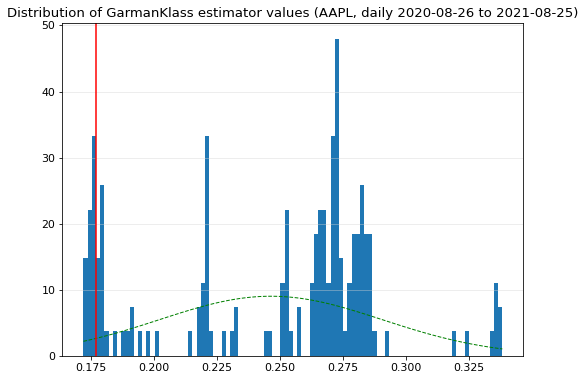

In [7]:
_,hist_plot = vol.histogram(90, 100,True)
hist_plot.show()

(<Figure size 576x432 with 2 Axes>,
 <module 'matplotlib.pyplot' from 'C:\\Users\\frede\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>)

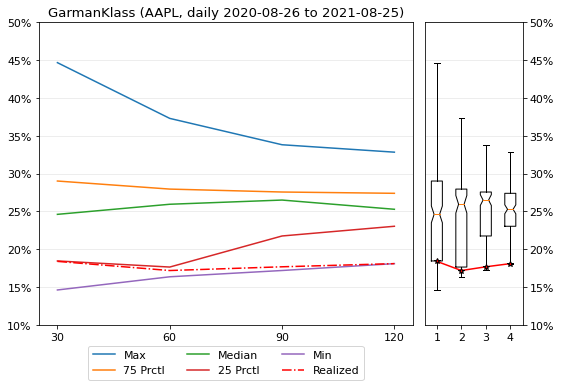

In [8]:
vol.cones()

(<Figure size 576x432 with 2 Axes>,
 <module 'matplotlib.pyplot' from 'C:\\Users\\frede\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>)

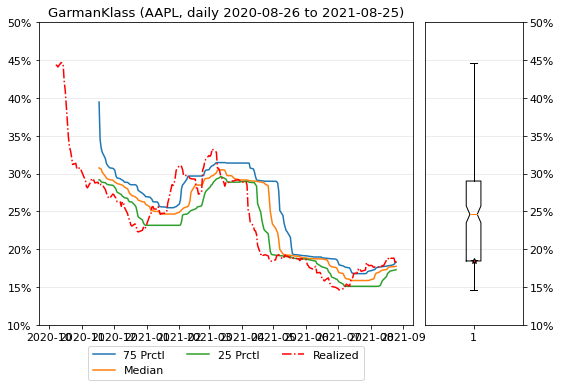

In [9]:
vol.rolling_quantiles()

(<Figure size 576x432 with 3 Axes>,
 <module 'matplotlib.pyplot' from 'C:\\Users\\frede\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>)

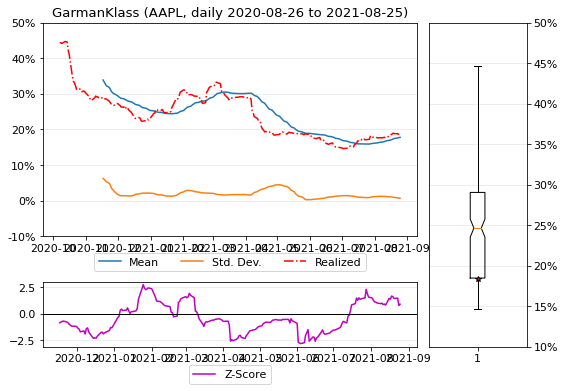

In [10]:
vol.rolling_descriptives()